In [1]:
import importlib.util
import os
import matplotlib.pyplot as plt
import numpy as np

# Add the DLL directory
os.add_dll_directory("C:\\Program Files\\Lumerical\\v231\\api\\python")

# Define the module name and file path
module_name = "lumapi"
# file_path = "C:\\Program Files\\Lumerical\\v232\\api\\python\\lumapi.py"
# file_path = "C:\\Program Files\\Lumerical\\v232\\api\\python\\lumapi.py"
file_path = "C:\\Program Files\\Lumerical\\v231\\api\\python\\lumapi.py"


def load_module_from_file(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module


# Load the module
lumapi = load_module_from_file(module_name, file_path)

In [4]:
def calculate_neff(r,a,n):

    Area_inital_circle = np.pi*r**2
    neff = (Area_inital_circle + n*(a**2 - Area_inital_circle))/(a**2)

    return neff

def back_calculate_r(r,ai,af):
    Area_initial_circle = np.pi*r**2
    
    n_si = 3.444
    n_sin = 2

    rfinal_temp = (((af/ai)**2)*(Area_initial_circle*(1-n_si) + n_si*ai**2) - n_sin*af**2)/(np.pi*(1-n_sin))

    rfinal = np.sqrt(rfinal_temp)

    return rfinal, rfinal_temp

def back_calculate_r_ring(r,ai,af,rfinal1):
    Area_initial_circle = np.pi*r**2
    
    nsi = 3.444
    n_sin = 2

    rfinal2 = np.sqrt((((af/ai)**2)*(Area_initial_circle*(1-nsi) + nsi*ai**2) - n_sin*af**2)/(np.pi*(1-n_sin)) + rfinal1**2)

    if(rfinal2 > af):
        rfinal2 = np.nan

    return rfinal2

In [2]:
folder_path = r"C:\Users\RamakrishnaVenkitakr\OneDrive - Pixel Photonics GmbH\codes\Scattering-Structures\RCWA\photonic_crystal_sclab_example"

# folder_name = r"Ram_pc_slab_rcwa.fsp" #"pc_slab_rcwa.fsp"
folder_name = r"pc_slab_rcwa_Silicon.fsp" #"pc_slab_rcwa.fsp"
# folder_name = r"pc_slab_rcwa.fsp" #"pc_slab_rcwa.fsp"
# folder_name = r"ref_pc_slab_rcwa.fsp" #"pc_slab_rcwa.fsp"

file_path = os.path.join(folder_path,folder_name)

rcwa = lumapi.FDTD(filename=file_path)

In [58]:
ai = 2
ri = 1
n_si = 3.44

neff = calculate_neff(ri,ai,n_si)

lam = 2*ai/neff

a_by_lam = ai/lam

print('neff =  %s' %neff)
print('lam = %s um' %lam)
print('a/lam = %s um' %a_by_lam)

neff =  1.5236284813102263
lam = 2.6253119110508143 um
a/lam = 0.7618142406551132 um


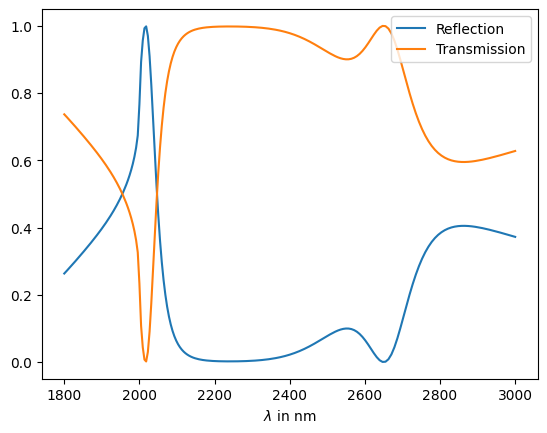

In [62]:
total_energy = rcwa.getresult("RCWA", "total_energy")
lam = total_energy["lambda"]*1e+9 # [nm]
Rp = total_energy["Rp"]
Tp = total_energy["Tp"]
plt.plot(lam, Rp, label="Reflection")
plt.plot(lam, Tp, label="Transmission")
plt.xlabel(r"$\lambda$ in nm")
# plt.xlim([1200,1300])
plt.legend(loc="upper right")
plt.show()

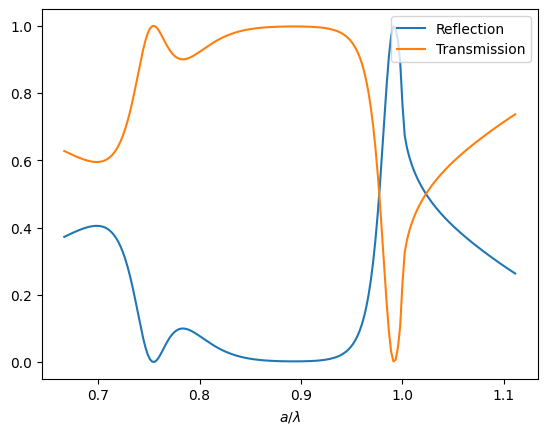

In [64]:
a = ai*1e-6
total_energy = rcwa.getresult("RCWA", "total_energy")
lam = total_energy["lambda"]
Rp = total_energy["Rp"]
Tp = total_energy["Tp"]
plt.plot(a/lam, Rp, label="Reflection")
plt.plot(a/lam, Tp, label="Transmission")
plt.xlabel(r"$a/ \lambda$")
plt.legend(loc="upper right")
plt.show()

In [5]:
folder_path = r"C:\Users\RamakrishnaVenkitakr\OneDrive - Pixel Photonics GmbH\codes\Scattering-Structures\RCWA\photonic_crystal_sclab_example"

folder_name = r"pc_slab_rcwa.fsp" #"pc_slab_rcwa.fsp"

file_path = os.path.join(folder_path,folder_name)

rcwa = lumapi.FDTD(filename=file_path)

In [7]:
ri = 1
ai = 2
af = 2

rfinal, rfinal_temp = back_calculate_r(ri,ai,af)

print('new rf = %s for af = %s' %(rfinal, af))

# print(rfinal_temp)

ri = rfinal
n = 2

neff = calculate_neff(ri,ai,n)

lam = 2*ai/neff

a_by_lam = ai/lam

print('-----------------------')
print('neff =  %s' %neff)
print('lam = %s um' %lam)
print('a/lam ~ %s um' %a_by_lam)

new rf = 0.7781015983805876 for af = 2
-----------------------
neff =  1.5244868886566363
lam = 2.6238336516785417 um
a/lam ~ 0.762243444328318 um


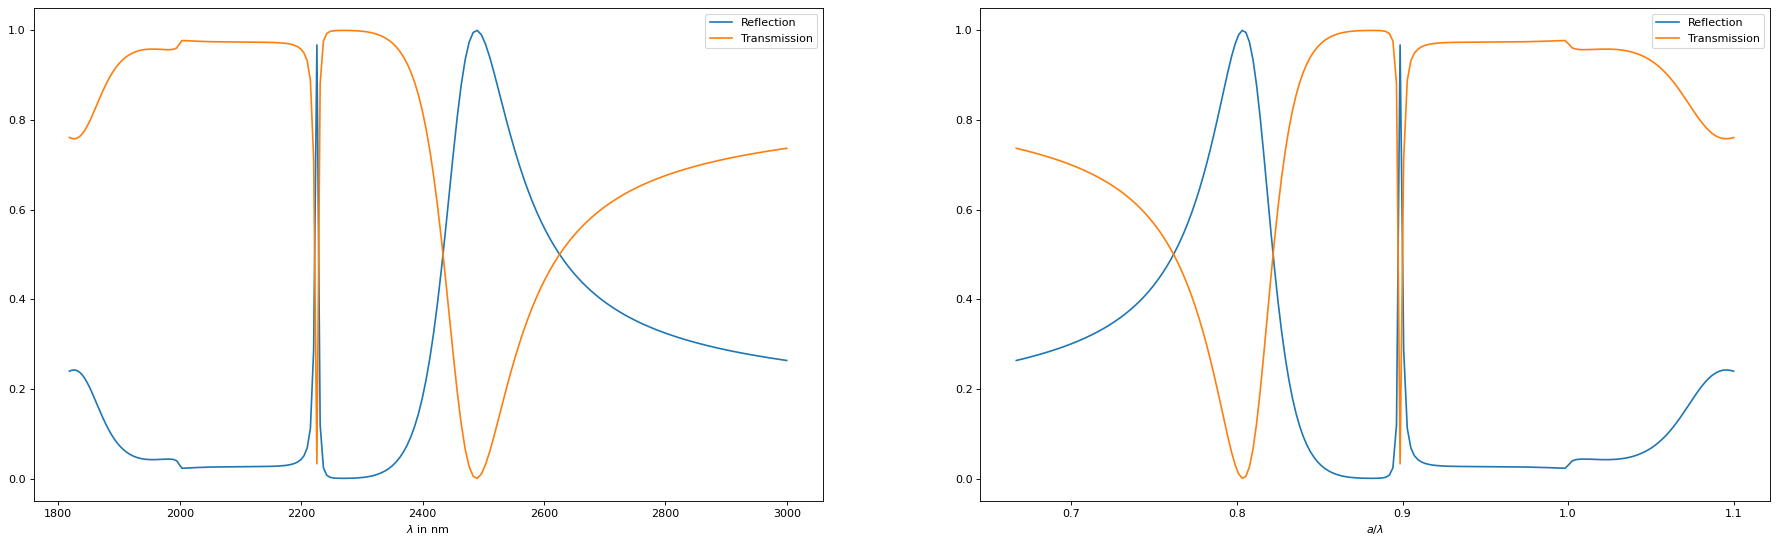

In [8]:
a = ai*1000
total_energy = rcwa.getresult("RCWA", "total_energy")
lam = total_energy["lambda"]*1e+9 # [nm]
Rp = total_energy["Rp"]
Tp = total_energy["Tp"]

fig = plt.figure(figsize=(28, 8), dpi=80)
plt.subplot(1,2,1)
plt.plot(lam, Rp, label="Reflection")
plt.plot(lam, Tp, label="Transmission")
plt.xlabel(r"$\lambda$ in nm")
# plt.xlim([1200,1300])
plt.legend(loc="upper right")
plt.subplot(1,2,2)
plt.plot(a/lam, Rp, label="Reflection")
plt.plot(a/lam, Tp, label="Transmission")
plt.xlabel(r"$a/ \lambda$")
plt.legend(loc="upper right")
plt.show()

In [2]:
folder_path = r"C:\Users\RamakrishnaVenkitakr\OneDrive - Pixel Photonics GmbH\codes\Scattering-Structures\RCWA\photonic_crystal_sclab_example"

folder_name = r"Ram_pc_slab_rcwa.fsp" #"pc_slab_rcwa.fsp"

file_path = os.path.join(folder_path,folder_name)

rcwa = lumapi.FDTD(filename=file_path)

In [5]:
ri = 1
ai = 2
af = 2
rfinal1 = 0.5

rfinal2 = back_calculate_r_ring(ri,ai,af,rfinal1)


print('rfinal2 = %s and rfinal1 = %s for  af = %s' %(np.round(rfinal2,4), rfinal1, af))

# print(rfinal_temp)

ri = rfinal1
n = 2

neff = calculate_neff(ri,ai,n)

lam = 2*ai/neff

a_by_lam = ai/lam

print('-----------------------')
print('neff =  %s' %neff)
print('lam = %s um' %lam)
print('a/lam ~ %s um' %a_by_lam)

rfinal2 = 0.9249 and rfinal1 = 0.5 for  af = 2
-----------------------
neff =  1.803650459150638
lam = 2.217724603847938 um
a/lam ~ 0.901825229575319 um


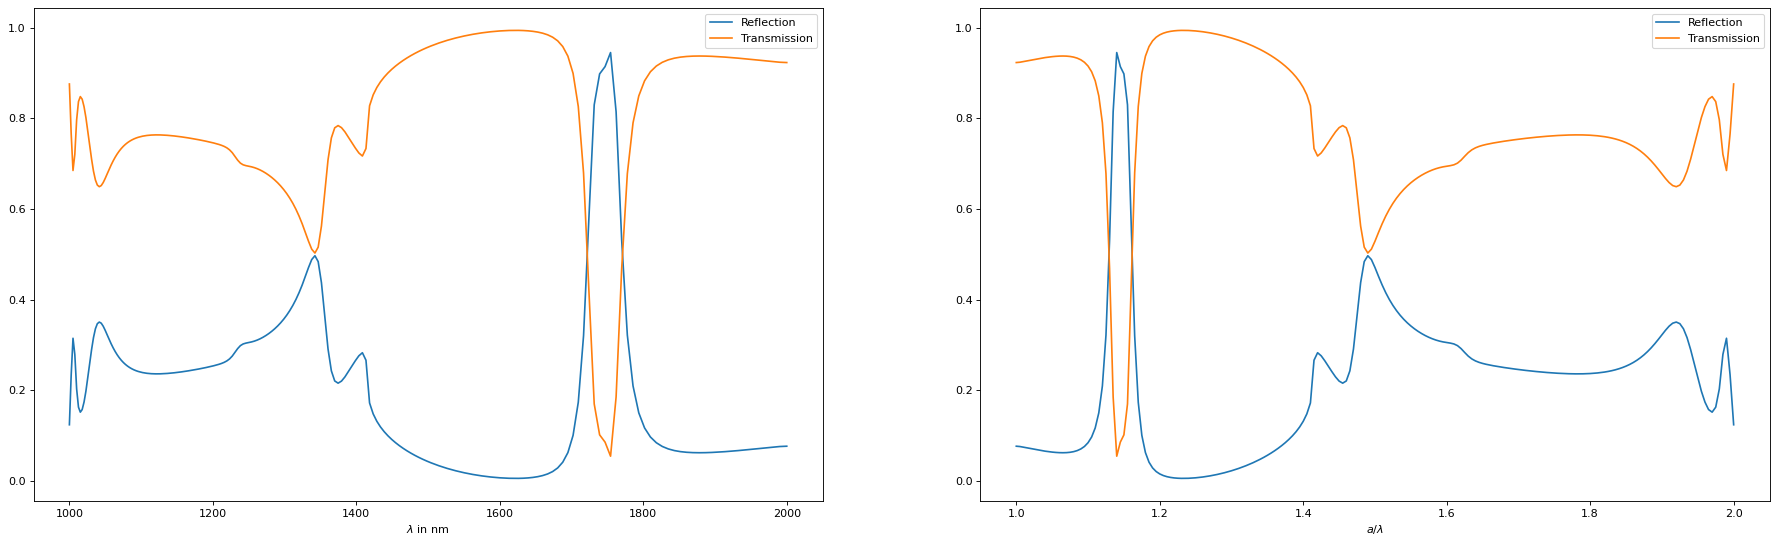

In [7]:
a = af*1000
total_energy = rcwa.getresult("RCWA", "total_energy")
lam = total_energy["lambda"]*1e+9 # [nm]
Rp = total_energy["Rp"]
Tp = total_energy["Tp"]

fig = plt.figure(figsize=(28, 8), dpi=80)
plt.subplot(1,2,1)
plt.plot(lam, Rp, label="Reflection")
plt.plot(lam, Tp, label="Transmission")
plt.xlabel(r"$\lambda$ in nm")
# plt.xlim([1200,1300])
plt.legend(loc="upper right")
plt.subplot(1,2,2)
plt.plot(a/lam, Rp, label="Reflection")
plt.plot(a/lam, Tp, label="Transmission")
plt.xlabel(r"$a/ \lambda$")
plt.legend(loc="upper right")
plt.show()

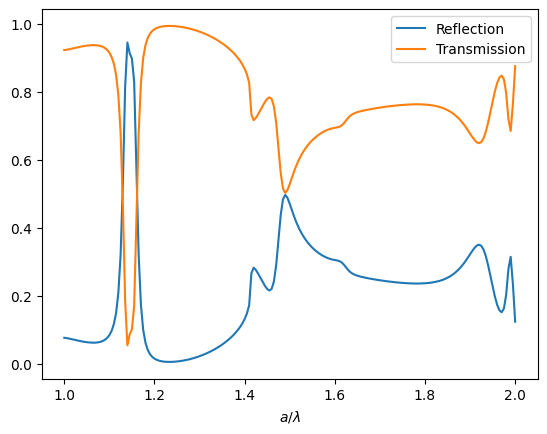

In [8]:
plt.plot(a/lam, Rp, label="Reflection")
plt.plot(a/lam, Tp, label="Transmission")
plt.xlabel(r"$a/ \lambda$")
plt.legend(loc="upper right")
plt.show()

In [22]:
results = {'lam':lam,'Rp':Rp,'Tp':Tp}

path = r"C:\Users\RamakrishnaVenkitakr\OneDrive - Pixel Photonics GmbH\codes\Scattering-Structures\RCWA\photonic_crystal_sclab_example\results_Ram"
a_name = int(a*1e6)
np.save(os.path.join(path,'a_%s_micron' %a_name),results)